**Shubham Gopal Raul**  
*CB.EN.P2AEL23023*<br>

## <center>21BM681 Machine Learning and Embedded Programming Lab 9</center>

### <center>Decision Making – Ensemble Learning</center>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
Models = [('DecTree',DecisionTreeClassifier()),('randForest',RandomForestClassifier()),('svc',SVC()),('knn',KNeighborsClassifier()),('knn1',KNeighborsClassifier(n_neighbors=3)),('knn2',KNeighborsClassifier(n_neighbors=4)),('knn3',KNeighborsClassifier(n_neighbors=6))]

### Iris Dataset

In [3]:
iris_data = pd.read_csv('../Data/iris.csv',names=['Sepal_length','Sepal_width','Petal_length','Petal_width','Species'])
Encoder = LabelEncoder()
iris_data['Species'] = Encoder.fit_transform(iris_data['Species'])
iris_data.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
 x_train, x_test, y_train, y_test = train_test_split(iris_data.drop('Species',axis=1),iris_data.Species,test_size=0.2,random_state=100)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 1.0, 'Voting Classifier')

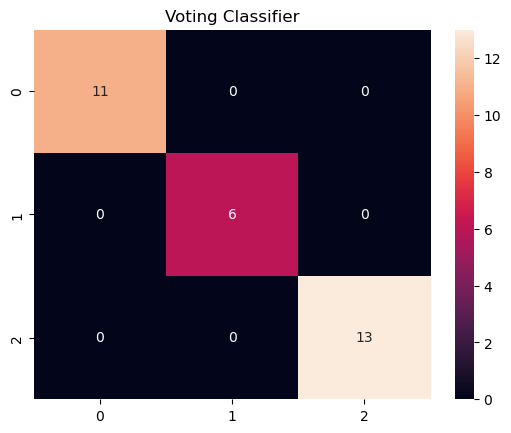

In [6]:
cls = VotingClassifier(estimators=Models,voting='hard')
cls.fit(x_train,y_train)
y_pred = cls.predict(x_test)
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='g').set_title('Voting Classifier')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 1.0, 'K Nearest Neighors')

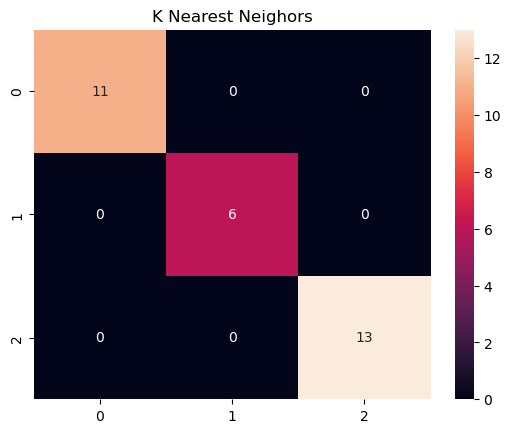

In [7]:
cls = KNeighborsClassifier(n_neighbors=3)
cls.fit(x_train,y_train)
y_pred = cls.predict(x_test)
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='g').set_title('K Nearest Neighors')

### Car Evaluation Dataset

In [8]:
car_data = car_data = pd.read_csv('../Data/car_evaluation.csv',names=['Buying_price','Maintainance_Price','No_of_doors','Person_Capacity','Size_of_luggage','Safety','Acceptability'])
Encoder = LabelEncoder()
for i in car_data.columns:
    car_data[i] = Encoder.fit_transform(car_data[i])
car_data.head()

,Buying_price,Maintainance_Price,No_of_doors,Person_Capacity,Size_of_luggage,Safety,Acceptability
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [9]:
 x_train, x_test, y_train, y_test = train_test_split(car_data.drop('Acceptability',axis=1),car_data.Acceptability,test_size=0.2,random_state=100)


              precision    recall  f1-score   support

           0       0.81      0.85      0.83        72
           1       1.00      0.47      0.64        17
           2       0.95      0.99      0.97       248
           3       1.00      0.56      0.71         9

    accuracy                           0.92       346
   macro avg       0.94      0.72      0.79       346
weighted avg       0.93      0.92      0.92       346



Text(0.5, 1.0, 'Car Data')

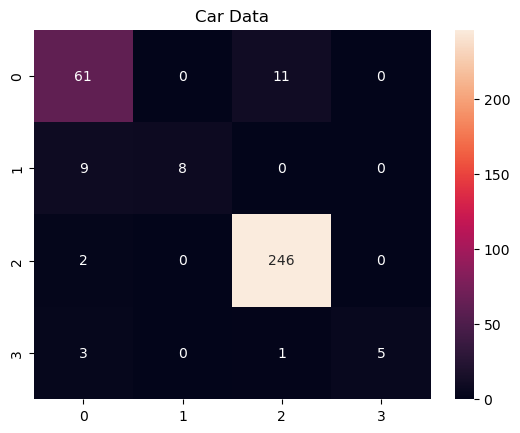

In [10]:
cls2 = VotingClassifier(estimators=Models,voting='hard')
cls2.fit(x_train,y_train)
y_pred = cls2.predict(x_test)
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='g').set_title("Car Data")